In [1]:
import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from tensorflow_probability import distributions


import em_hypersphere

# Parameters


In [22]:
# Observation dimension
d = 3
n = 100

In [23]:
# Parameters to estimate
c = 10*np.random.rand(d,1)-5
r = 2 + 3*np.random.rand()
sigma2 = 0.05

In [24]:
if d==3:
    # Theoretical sphere
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = c[0] + r * np.outer(np.cos(u), np.sin(v))
    y = c[1] + r * np.outer(np.sin(u), np.sin(v))
    z = c[2] + r * np.outer(np.ones(np.size(u)), np.cos(v))
elif d==2:
    # Theoretical circle
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    x = c[0] + r * np.cos(u)
    y = c[1] + r * np.sin(u)

In [25]:
# Hidden variables
# Prior parameters
kappa = 2
mu = np.random.randn(d,1)
mu = mu/np.linalg.norm(mu)

# Generation
prior = distributions.VonMisesFisher(mean_direction=mu.transpose(), concentration=kappa)
U = prior.sample(n).numpy()[:,0,:]

In [26]:
# Observations
Z = np.matlib.repmat(c.transpose(),n,1)+r*U+np.sqrt(sigma2)*np.random.randn(n,d)

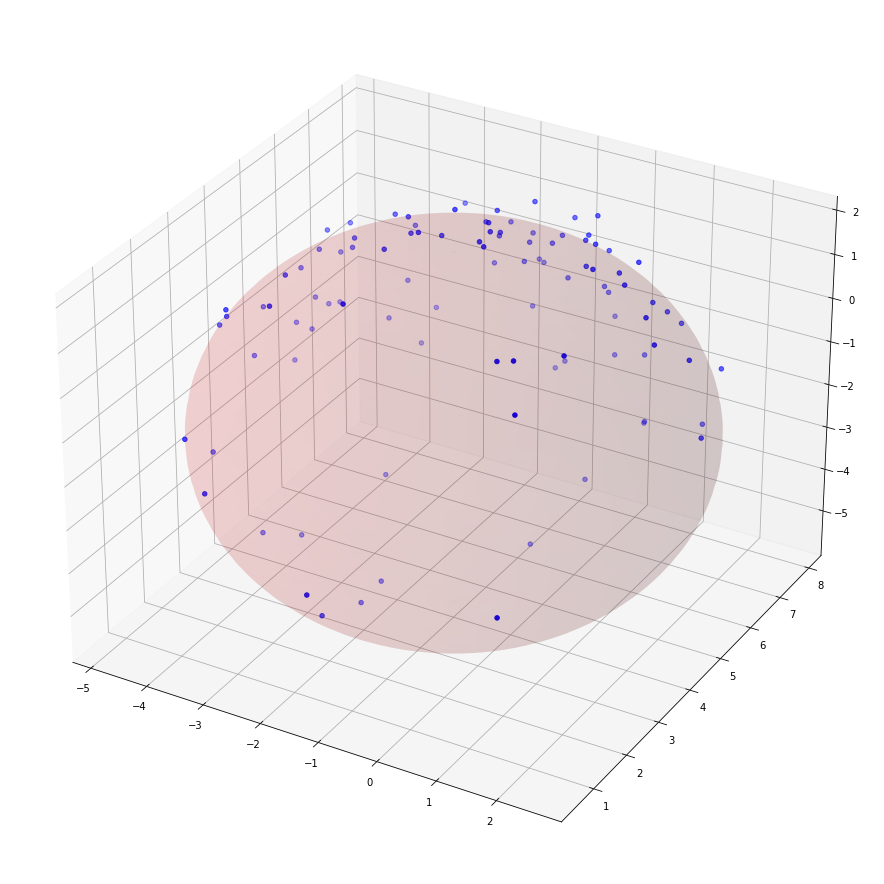

In [27]:
if d == 3:
    fig = plt.figure(figsize=(16,16))

    ax1 = fig.gca(projection='3d')
    ax1.set_xlim3d(c[0]-r,c[0]+r)
    ax1.set_ylim3d(c[1]-r,c[1]+r)
    ax1.set_zlim3d(c[2]-r,c[2]+r)

    ax1.plot_surface(x, y, z, color='tab:red', alpha=0.1)
    ax1.scatter(Z[:,0], Z[:,1], Z[:,2], c = 'blue')

elif d == 2:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y, color='tab:red', alpha=0.1)
    ax1.scatter(Z[:,0], Z[:,1], c = 'blue')    

In [28]:
em_alg = em_hypersphere.em_hypersphere()

In [29]:
r_em, c_em, sigma2_em, r_mem, c_mem, sigma2_mem, = em_alg.fit_hypersphere(Z, mu_prior = mu, kappa_prior = kappa)

Von-Mises Fisher prior used with kappa = 2 and mu = [[-0.28406647]
 [ 0.68199344]
 [ 0.67393708]]


In [30]:
r

4.028244304112529

In [31]:
r_em

4.069237812690883

In [32]:
c

array([[-1.12886335],
       [ 4.23181134],
       [-1.88729564]])

In [33]:
c_em

array([-1.15663614,  4.18037631, -1.94682634])

In [34]:
sigma2

0.05

In [35]:
sigma2_em

0.04628568519310344